In [1]:
from six.moves import urllib
from sklearn.datasets import fetch_mldata
try:
    mnist = fetch_mldata('MNIST original')
except urllib.error.HTTPError as ex:
    print("Could not download MNIST data from mldata.org, trying alternative...")

    # Alternative method to load MNIST, if mldata.org is down
    from scipy.io import loadmat
    mnist_alternative_url = "https://github.com/amplab/datascience-sp14/raw/master/lab7/mldata/mnist-original.mat"
    mnist_path = "./mnist-original.mat"
    response = urllib.request.urlopen(mnist_alternative_url)
    with open(mnist_path, "wb") as f:
        content = response.read()
        f.write(content)
    mnist_raw = loadmat(mnist_path)
    mnist = {
        "data": mnist_raw["data"].T,
        "target": mnist_raw["label"][0],
        "COL_NAMES": ["label", "data"],
        "DESCR": "mldata.org dataset: mnist-original",
    }
    print("Success!")

In [2]:
from sklearn.model_selection import train_test_split

X = mnist["data"]
y = mnist["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [3]:

from sklearn.decomposition import PCA
import numpy as np

#X = X_train

#pca = PCA()
#pca.fit(X)
#d = np.argmax(np.cumsum(pca.explained_variance_ratio_) >= 0.95) + 1
#d

In [4]:
#pca = PCA(n_components=0.95)
#X_reduced = pca.fit_transform(X)
#pca.n_components_

In [5]:
#np.sum(pca.explained_variance_ratio_)

In [6]:
X_mnist = X_train

pca = PCA(n_components = 0.95)
#X_mnist_reduced = pca.fit_transform(X_mnist)
#X_mnist_recovered = pca.inverse_transform(X_mnist_reduced)

In [7]:
#pca.n_components_

In [8]:
X_mnist_reduced = pca.fit_transform(X_mnist)

In [9]:
X_mnist_recovered = pca.inverse_transform(X_mnist_reduced)

In [10]:

def plot_digits(instances, images_per_row=5, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = matplotlib.cm.binary, **options)
    plt.axis("off")

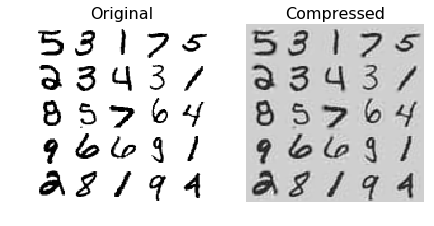

In [11]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

plt.figure(figsize=(7, 4))
plt.subplot(121)
plot_digits(X_mnist[::2100])
plt.title("Original", fontsize=16)
plt.subplot(122)
plot_digits(X_mnist_recovered[::2100])
plt.title("Compressed", fontsize=16)

#save_fig("mnist_compression_plot")

In [12]:

from sklearn.decomposition import IncrementalPCA

n_batches = 100
inc_pca = IncrementalPCA(n_components=154)
for X_batch in np.array_split(X_mnist, n_batches):
    print(".", end="")
    inc_pca.partial_fit(X_batch)

X_mnist_reduced_inc = inc_pca.transform(X_mnist)

....................................................................................................

In [13]:
X_mnist_recovered_inc = inc_pca.inverse_transform(X_mnist_reduced_inc)

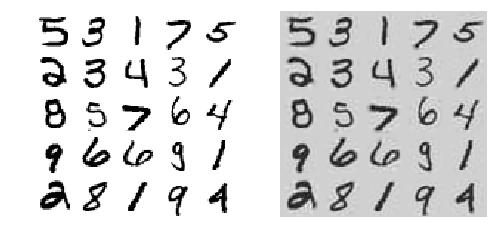

In [14]:

plt.figure(figsize=(7, 4))
plt.subplot(121)
plot_digits(X_mnist[::2100])
plt.subplot(122)
plot_digits(X_mnist_recovered_inc[::2100])
plt.tight_layout()

In [15]:

filename = "my_mnist.data"

X_mm = np.memmap(filename, dtype='float32', mode='write', shape=X_mnist.shape)
X_mm[:] = X_mnist
del X_mm

In [16]:
X_mm = np.memmap(filename, dtype='float32', mode='readonly', shape=X_mnist.shape)

batch_size = len(X_mnist) // n_batches
inc_pca = IncrementalPCA(n_components=154, batch_size=batch_size)
inc_pca.fit(X_mm)

IncrementalPCA(batch_size=525, copy=True, n_components=154, whiten=False)

In [ ]:
rnd_pca = PCA(n_components=50, random_state=42, svd_solver="randomized")
X_reduced = rnd_pca.fit_transform(X_mnist)